# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6+ syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [21]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    a = np.size(Y_train[Y_train==1])/np.size(Y_train)
    mu_minus = np.mean(X_train[Y_train==-1], axis=0)
    mu_plus = np.mean(X_train[Y_train==1], axis=0)
    

    m = X_test.shape[0]
    Y_test_pred = np.zeros(shape=m)
    for i in range(m):
        val_plus = a * np.exp(-1 * np.dot(np.subtract(X_test[i], mu_plus), np.subtract(X_test[i], mu_plus)))
        val_minus = (1-a) * np.exp(-1 * np.dot(np.subtract(X_test[i], mu_minus), np.subtract(X_test[i], mu_minus)))
        if val_plus >= val_minus:
            Y_test_pred[i] = 1
        else:
            Y_test_pred[i] = -1
    return Y_test_pred
    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    n = Y_train.shape[0]
    a = np.size(Y_train[Y_train==1])/np.size(Y_train)
    mu_minus = np.mean(X_train[Y_train==-1], axis=0)
    mu_plus = np.mean(X_train[Y_train==1], axis=0)

    d = X_train[0].shape[0]
    cov_shape = (d,d)
    cov = np.zeros(shape=cov_shape)
    for i in range(n):
        if Y_train[i] == 1:
            cov = np.add(cov, np.outer(np.subtract(X_train[i], mu_plus), np.subtract(X_train[i], mu_plus)))
        else:
            cov = np.add(cov, np.outer(np.subtract(X_train[i], mu_minus), np.subtract(X_train[i], mu_minus)))
    cov = cov/n
    cov_inv = np.linalg.inv(cov)

    m = X_test.shape[0]
    Y_test_pred = np.zeros(shape=m)
    for i in range(m):
        val_plus = a * np.exp(-1 * np.dot(np.subtract(X_test[i], mu_plus), np.matmul(cov_inv, np.subtract(X_test[i], mu_plus))))
        val_minus = (1-a) * np.exp(-1 * np.dot(np.subtract(X_test[i], mu_minus), np.matmul(cov_inv, np.subtract(X_test[i], mu_minus))))
        if val_plus >= val_minus:
            Y_test_pred[i] = 1
        else:
            Y_test_pred[i] = -1
    return Y_test_pred


def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    n = Y_train.shape[0]
    n_plus = np.size(Y_train[Y_train==1])
    n_minus = np.size(Y_train[Y_train==-1])
    a = np.size(Y_train[Y_train==1])/np.size(Y_train)
    mu_minus = np.mean(X_train[Y_train==-1], axis=0)
    mu_plus = np.mean(X_train[Y_train==1], axis=0)
    d = X_train[0].shape[0]
    cov_plus = np.zeros(shape=(d,d))
    cov_minus = np.zeros(shape=(d,d))
    for i in range(n):
        if Y_train[i] == 1:
            cov_plus = np.add(cov_plus, np.outer(np.subtract(X_train[i], mu_plus), np.subtract(X_train[i], mu_plus)))
        else:
            cov_minus = np.add(cov_minus, np.outer(np.subtract(X_train[i], mu_minus), np.subtract(X_train[i], mu_minus)))
    cov_plus = cov_plus/n_plus
    cov_minus = cov_minus/n_minus
    cov_plus_inv = np.linalg.inv(cov_plus)
    cov_minus_inv = np.linalg.inv(cov_minus)
    det_cov_plus = np.linalg.det(cov_plus)
    det_cov_minus = np.linalg.det(cov_minus)

    m = X_test.shape[0]
    Y_test_pred = np.zeros(shape=m)
    for i in range(m):
        val_plus = a * (np.exp(-1*np.dot(np.subtract(X_test[i], mu_plus), np.matmul(cov_plus_inv, np.subtract(X_test[i], mu_plus)))))/det_cov_plus
        val_minus = (1-a) * (np.exp(-1*np.dot(np.subtract(X_test[i], mu_minus), np.matmul(cov_minus_inv, np.subtract(X_test[i], mu_minus)))))/det_cov_minus
        if val_plus >= val_minus:
            Y_test_pred[i] = 1
        else:
            Y_test_pred[i] = -1
    return Y_test_pred

    





In [22]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_true=Y_test, y_pred=Y_pred_test_1a))
print(accuracy_score(y_true=Y_test, y_pred=Y_pred_test_1b))
print(accuracy_score(y_true=Y_test, y_pred=Y_pred_test_1c))



0.8685
0.87
0.8695


**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


0.126 0.12450000000000006 0.12450000000000006


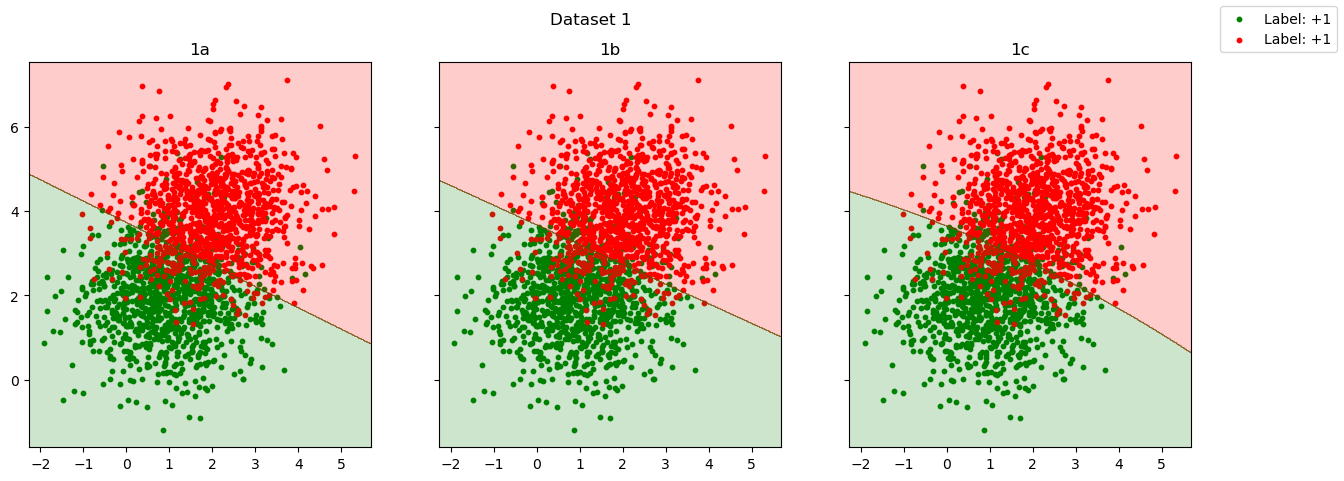

0.008499999999999952 0.0 0.0


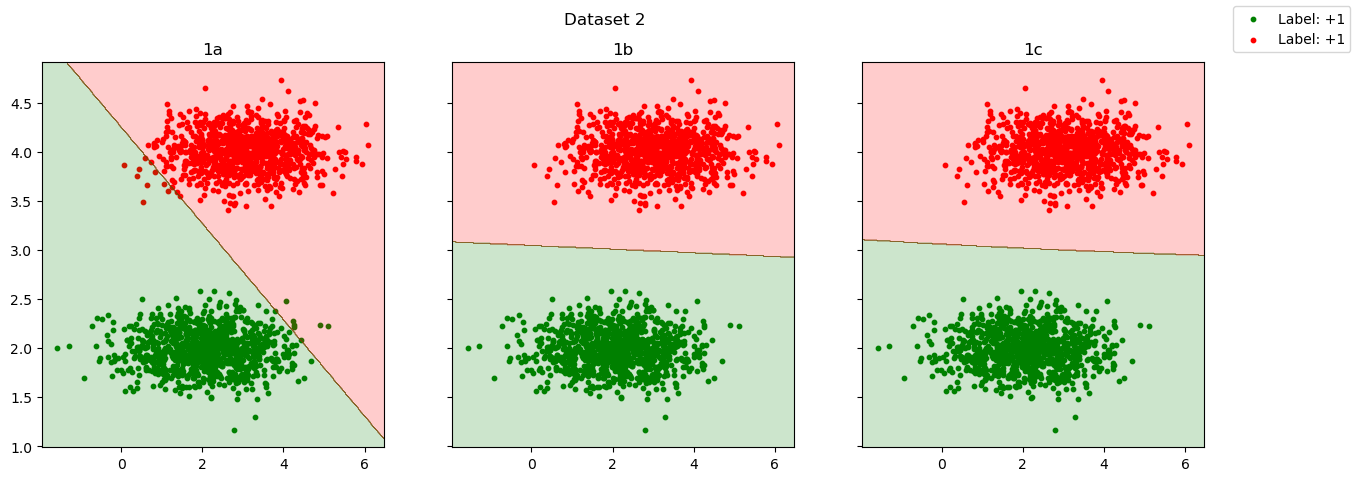

0.497 0.495 0.135


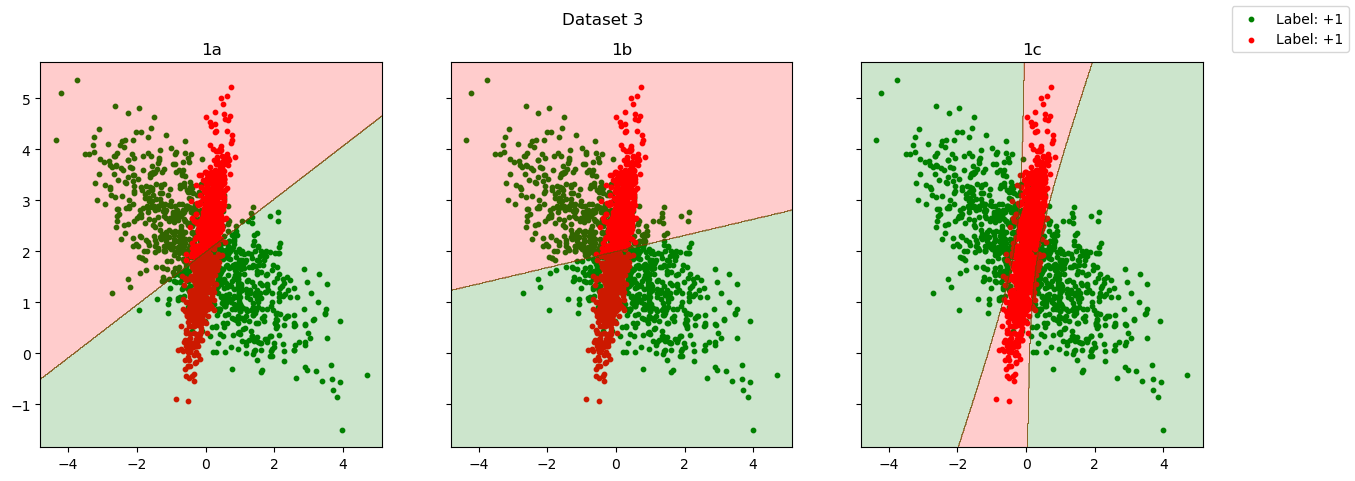

In [24]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

from sklearn.metrics import accuracy_score
dataset1 = [0, 0, 0]
dataset1[0] = np.load("Datasets/dataset1_1.npz")
dataset1[1] = np.load("Datasets/dataset1_2.npz")
dataset1[2] = np.load("Datasets/dataset1_3.npz")
for i in range(3):
    X_train = dataset1[i]['arr_0']
    Y_train = dataset1[i]['arr_1']
    X_test = dataset1[i]['arr_2']
    Y_test = dataset1[i]['arr_3']
    Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
    Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
    Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)
    print(1-accuracy_score(y_true=Y_test, y_pred=Y_pred_test_1a), 1-accuracy_score(y_true=Y_test, y_pred=Y_pred_test_1b), 1-accuracy_score(y_true=Y_test, y_pred=Y_pred_test_1c), sep=' ', end='\n')
    X_train_plus = X_train[Y_train==1]
    X_train_minus = X_train[Y_train==-1]

    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,5))

    line1 = ax1.scatter(x=X_train_plus[:,0], y=X_train_plus[:,1], c="green", s=10)
    line2 = ax1.scatter(x=X_train_minus[:,0], y=X_train_minus[:,1], c="red", s=10)
    ax1.set_title(label="1a")
    x_min, x_max = ax1.get_xlim()
    y_min, y_max = ax1.get_ylim()
    X,Y = np.meshgrid(np.linspace(x_min,x_max,500), np.linspace(y_min,y_max,500))
    X_bg = np.transpose(np.array([np.ndarray.flatten(X), np.ndarray.flatten(Y)]))
    Z = Bayes1a(X_train, Y_train, X_bg)
    Z = np.reshape(a=Z, newshape=X.shape, order='C')
    ax1.contourf(X, Y, Z, colors=["Red", "Green"], alpha=0.2)

    ax2.scatter(x=X_train_plus[:,0], y=X_train_plus[:,1], c="green", s=10)
    ax2.scatter(x=X_train_minus[:,0], y=X_train_minus[:,1], c="red", s=10)
    ax2.set_title(label="1b")
    x_min, x_max = ax2.get_xlim()
    y_min, y_max = ax2.get_ylim()
    X,Y = np.meshgrid(np.linspace(x_min,x_max,500), np.linspace(y_min,y_max,500))
    X_bg = np.transpose(np.array([np.ndarray.flatten(X), np.ndarray.flatten(Y)]))
    Z = Bayes1b(X_train, Y_train, X_bg)
    Z = np.reshape(a=Z, newshape=X.shape, order='C')
    ax2.contourf(X, Y, Z, colors=["Red", "Green"], alpha=0.2)

    ax3.scatter(x=X_train_plus[:,0], y=X_train_plus[:,1], c="green", s=10)
    ax3.scatter(x=X_train_minus[:,0], y=X_train_minus[:,1], c="red", s=10)
    ax3.set_title(label="1c")
    x_min, x_max = ax3.get_xlim()
    y_min, y_max = ax3.get_ylim()
    X,Y = np.meshgrid(np.linspace(x_min,x_max,500), np.linspace(y_min,y_max,500))
    X_bg = np.transpose(np.array([np.ndarray.flatten(X), np.ndarray.flatten(Y)]))
    Z = Bayes1c(X_train, Y_train, X_bg)
    Z = np.reshape(a=Z, newshape=X.shape, order='C')
    ax3.contourf(X, Y, Z, colors=["Red", "Green"], alpha=0.2)

    plt.suptitle(t="Dataset " + str(i+1))
    fig.legend(handles=[line1, line2], labels=["Label: +1", "Label: +1"])
    plt.show()



** Cell type : TextWrite ** 
(Write your observations and table of errors here)

### Observations:


### Error table:

|                  | Bayes 1a | Bayes 1b | Bayes 1c |
| :--------------: | :------: | :------: | :------: |
| <b>Dataset 1</b> | 0.126    | 0.1245   | 0.1245   |
| <b>Dataset 2</b> | 0.0085   | 0.0      | 0.0      |
| <b>Dataset 3</b> | 0.497    | 0.495    | 0.135    |





** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [25]:
# Cell type : CodeWrite
# Fill in functions in this cell


def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    n = X_train.shape[0]
    d = X_train.shape[1]
    m = X_test.shape[0]
    mu = [np.zeros(shape=d), np.zeros(shape=d), np.zeros(shape=d), np.zeros(shape=d)]
    a = [0, 0, 0, 0]
    
    for i in range(4):
        mu[i] = np.mean(X_train[Y_train==(i+1)], axis=0)
        a[i] = np.size(Y_train[Y_train==(i+1)])/np.size(Y_train)
    
    L = np.array([np.array([0, 1, 2, 3]), np.array([1, 0, 1, 2]), np.array([2, 1, 0, 1]), np.array([3, 2, 1, 0])])
    Y_test_pred = np.zeros(shape=m)
    for i in range(m):
        eta = [0, 0, 0, 0]
        for j in range(4):
            eta[j] = a[j] * np.exp(-1*np.dot(np.subtract(X_test[i], mu[j]), np.subtract(X_test[i], mu[j])))
        pred = 0
        probab = np.inf
        for j in range(4):
            if np.dot(eta, L[j]) < probab:
                probab = np.dot(eta, L[j])
                pred = j+1
        Y_test_pred[i] = pred
    return Y_test_pred
    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    n = X_train.shape[0]
    d = X_train.shape[1]
    m = X_test.shape[0]
    mu = [np.zeros(shape=d), np.zeros(shape=d), np.zeros(shape=d), np.zeros(shape=d)]
    a = [0, 0, 0, 0]
    for i in range(4):
        mu[i] = np.mean(X_train[Y_train==(i+1)], axis=0)
        a[i] = np.size(Y_train[Y_train==(i+1)])/np.size(Y_train)
    cov = np.zeros(shape=(d, d))
    for i in range(n):
        pred_class = int(Y_train[i] - 1)
        cov = np.add(cov, np.outer(np.subtract(X_train[i], mu[pred_class]), np.subtract(X_train[i], mu[pred_class])))
    cov = cov/n
    cov_inv = np.linalg.inv(cov)
    
    L = np.array([np.array([0, 1, 2, 3]), np.array([1, 0, 1, 2]), np.array([2, 1, 0, 1]), np.array([3, 2, 1, 0])])
    Y_test_pred = np.zeros(shape=m)
    for i in range(m):
        eta = [0, 0, 0, 0]
        for j in range(4):
            eta[j] = a[j] * np.exp(np.dot(-1*np.subtract(X_test[i], mu[j]), np.matmul(cov_inv, np.subtract(X_test[i], mu[j]))))
        pred = 0
        probab = np.inf
        for j in range(4):
            if np.dot(eta, L[j]) < probab:
                probab = np.dot(eta, L[j])
                pred = j+1
        Y_test_pred[i] = pred
    return Y_test_pred

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    n = X_train.shape[0]
    d = X_train.shape[1]
    m = X_test.shape[0]
    mu = [np.zeros(shape=d), np.zeros(shape=d), np.zeros(shape=d), np.zeros(shape=d)]
    a = [0, 0, 0, 0]
    for i in range(4):
        mu[i] = np.mean(X_train[Y_train==(i+1)], axis=0)
        a[i] = np.size(Y_train[Y_train==(i+1)])/np.size(Y_train)
    cov = [np.zeros(shape=(d, d)), np.zeros(shape=(d, d)), np.zeros(shape=(d, d)), np.zeros(shape=(d, d))]
    for i in range(n):
        pred_class = int(Y_train[i] - 1)
        cov[pred_class] = np.add(cov[pred_class], np.outer(np.subtract(X_train[i], mu[pred_class]), np.subtract(X_train[i], mu[pred_class])))
    for i in range(4):
        cov[i] = cov[i]/np.size(Y_train[Y_train==(i+1)])
    cov_inv = [np.zeros(shape=(d, d)), np.zeros(shape=(d, d)), np.zeros(shape=(d, d)), np.zeros(shape=(d, d))]
    det_cov = [0, 0, 0, 0]
    for i in range(4):
        cov_inv[i] = np.linalg.inv(cov[i])
        det_cov[i] = np.linalg.det(cov[i])
    
    L = np.array([np.array([0, 1, 2, 3]), np.array([1, 0, 1, 2]), np.array([2, 1, 0, 1]), np.array([3, 2, 1, 0])])
    Y_test_pred = np.zeros(shape=m)
    for i in range(m):
        eta = [0, 0, 0, 0]
        for j in range(4):
            eta[j] = a[j] * np.exp(-1*np.dot(np.subtract(X_test[i], mu[j]), np.matmul(cov_inv[j], np.subtract(X_test[i], mu[j]))))/det_cov[j]
        pred = 0
        probab = np.inf
        for j in range(4):
            if np.dot(eta, L[j]) < probab:
                probab = np.dot(eta, L[j])
                pred = j+1
        Y_test_pred[i] = pred
    return Y_test_pred

    
    


    


In [26]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_true=Y_test, y_pred=Y_pred_test_2a))
print(accuracy_score(y_true=Y_test, y_pred=Y_pred_test_2b))
print(accuracy_score(y_true=Y_test, y_pred=Y_pred_test_2c))



0.70875
0.70925
0.708


**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


0.28800000000000003 0.28674999999999995 0.28774999999999995


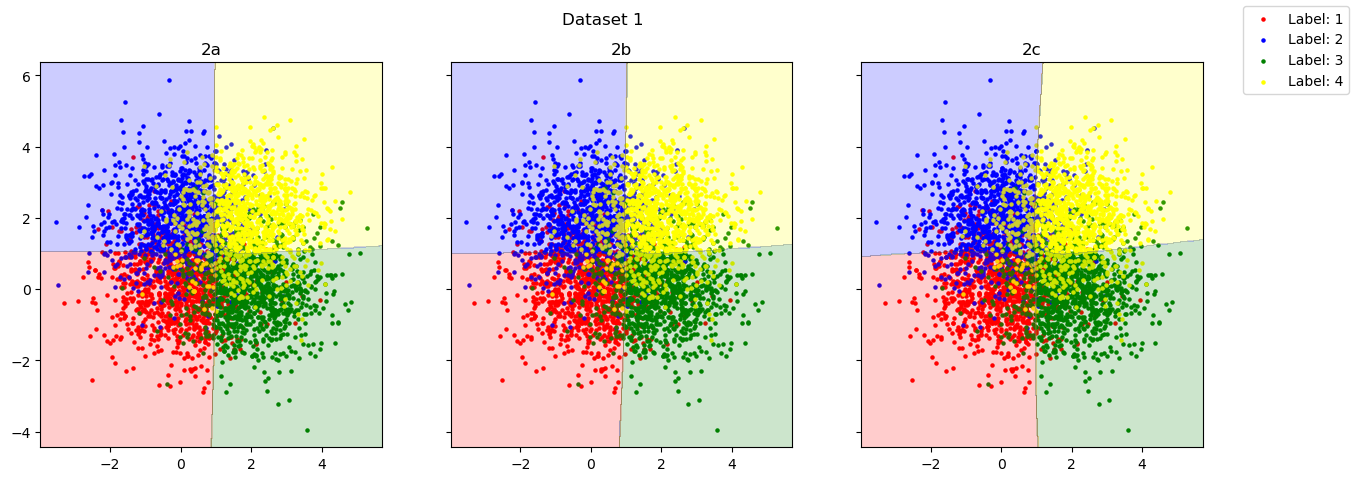

0.14549999999999996 0.15100000000000002 0.10375000000000001


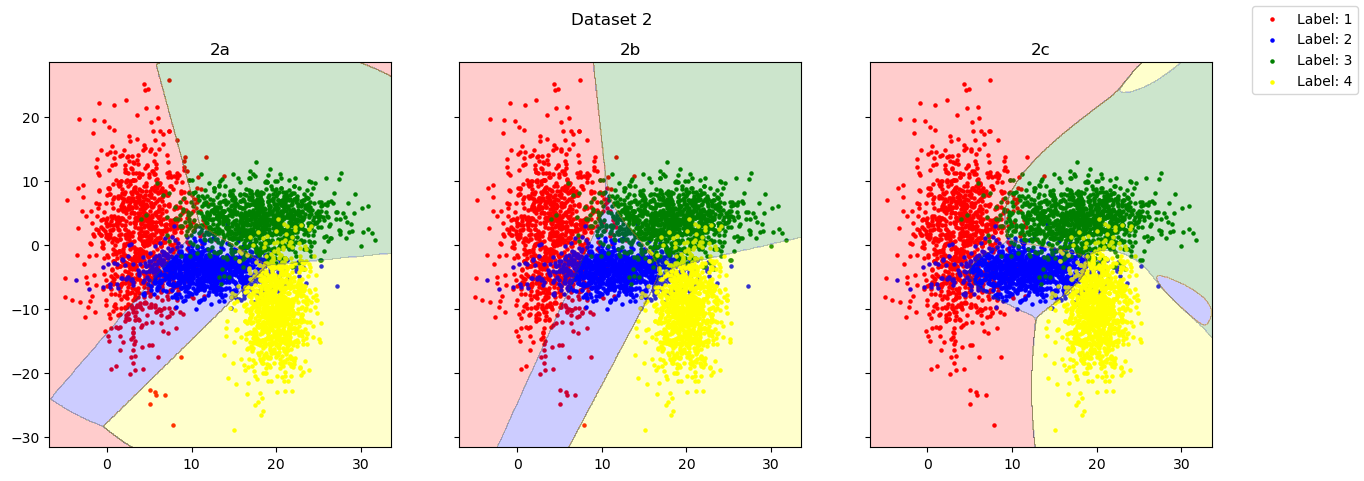

In [46]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

dataset2 = [0, 0]
dataset2[0] = np.load("Datasets/dataset2_1.npz")
dataset2[1] = np.load("Datasets/dataset2_2.npz")
for i in range(2):
    X_train = dataset2[i]['arr_0']
    Y_train = dataset2[i]['arr_1']
    X_test = dataset2[i]['arr_2']
    Y_test = dataset2[i]['arr_3']
    Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
    Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
    Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)
    print(1-accuracy_score(y_true=Y_test, y_pred=Y_pred_test_2a), 1-accuracy_score(y_true=Y_test, y_pred=Y_pred_test_2b), 1-accuracy_score(y_true=Y_test, y_pred=Y_pred_test_2c), sep=' ', end='\n')
    X_actual = [0, 0, 0, 0]
    X_pred_2a = [0, 0, 0, 0]
    X_pred_2b = [0, 0, 0, 0]
    X_pred_2c = [0, 0, 0, 0]
    X_training = [0, 0, 0, 0]
    c = ["red", "blue", "green", "yellow"]
    for j in range(4):
        X_training[j] = X_train[Y_train==(j+1)]

    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,5))
    line = [0, 0, 0, 0]
    for j in range(4):
        line[j] = ax1.scatter(x=X_training[j][:,0], y=X_training[j][:,1], c=c[j], s=5)
        ax2.scatter(x=X_training[j][:,0], y=X_training[j][:,1], c=c[j], s=5)
        ax3.scatter(x=X_training[j][:,0], y=X_training[j][:,1], c=c[j], s=5)
    x_min, x_max = ax1.get_xlim()
    y_min, y_max = ax1.get_ylim()

    X,Y = np.meshgrid(np.linspace(x_min,x_max,500), np.linspace(y_min,y_max,500))
    X_bg = np.transpose(np.array([np.ndarray.flatten(X), np.ndarray.flatten(Y)]))

    Z = Bayes2a(X_train, Y_train, X_bg)
    Z = np.reshape(a=Z, newshape=X.shape, order='C')
    ax1.contourf(X, Y, Z, colors=["Red", "Green", "Blue", "Yellow"], alpha=0.2)

    Z = Bayes2b(X_train, Y_train, X_bg)
    Z = np.reshape(a=Z, newshape=X.shape, order='C')
    ax2.contourf(X, Y, Z, colors=["Red", "Green", "Blue", "Yellow"], alpha=0.2)

    Z = Bayes2c(X_train, Y_train, X_bg)
    Z = np.reshape(a=Z, newshape=X.shape, order='C')
    ax3.contourf(X, Y, Z, colors=["Red", "Green", "Blue", "Yellow"], alpha=0.2)
    ax1.set_title(label="2a")
    ax2.set_title(label="2b")
    ax3.set_title(label="2c")
    plt.suptitle(t="Dataset " + str(i+1))
    fig.legend(handles=line, labels=["Label: 1", "Label: 2", "Label: 3", "Label: 4"])
    plt.show()


** Cell type : TextWrite ** 
(Write your observations and table of errors here)



**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




<Figure size 640x480 with 0 Axes>

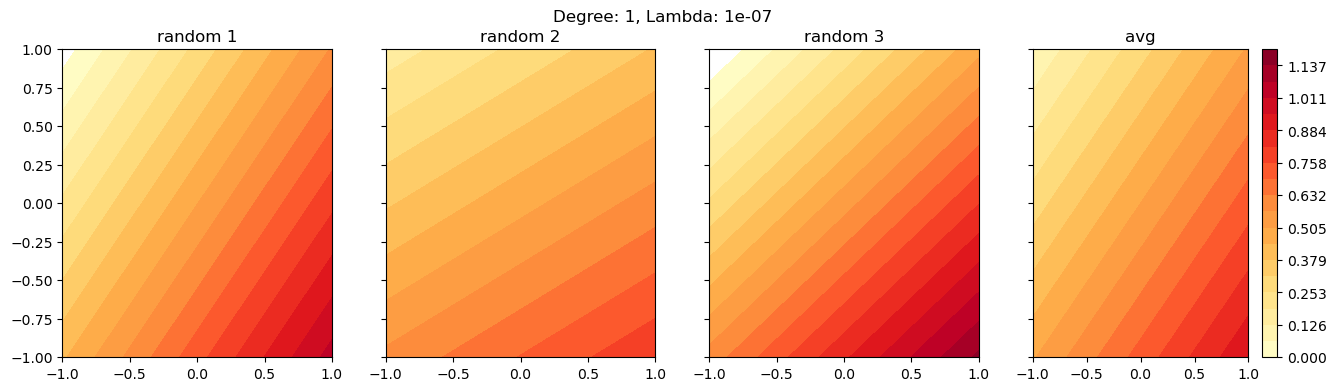

Degree= 1 lambda= 1e-07
Bias = 0.23498420077934307
Variance = 0.004480375193171464
MSE = 0.059697949809078076


<Figure size 640x480 with 0 Axes>

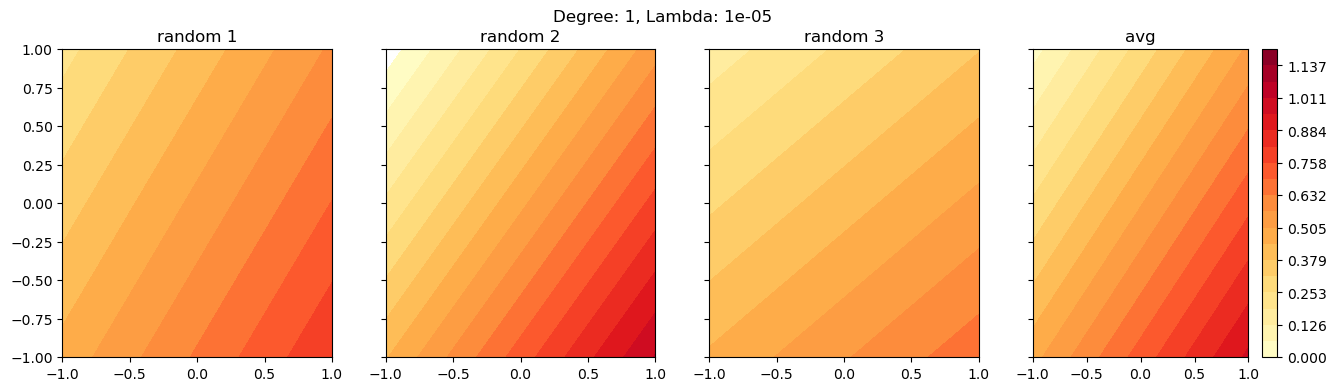

Degree= 1 lambda= 1e-05
Bias = 0.2351607026075832
Variance = 0.003674701179051467
MSE = 0.058975257229943664


<Figure size 640x480 with 0 Axes>

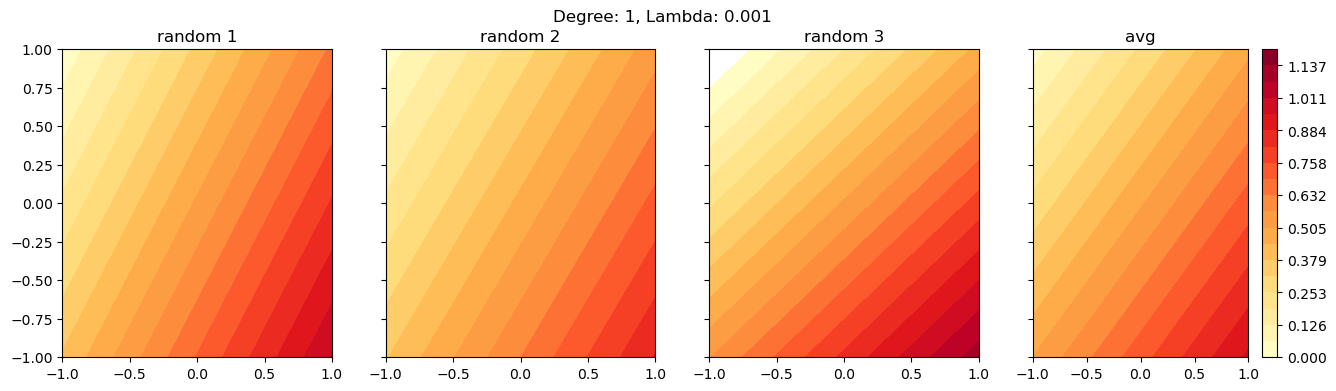

Degree= 1 lambda= 0.001
Bias = 0.23506951635476492
Variance = 0.003598323608194212
MSE = 0.05885600112745731


<Figure size 640x480 with 0 Axes>

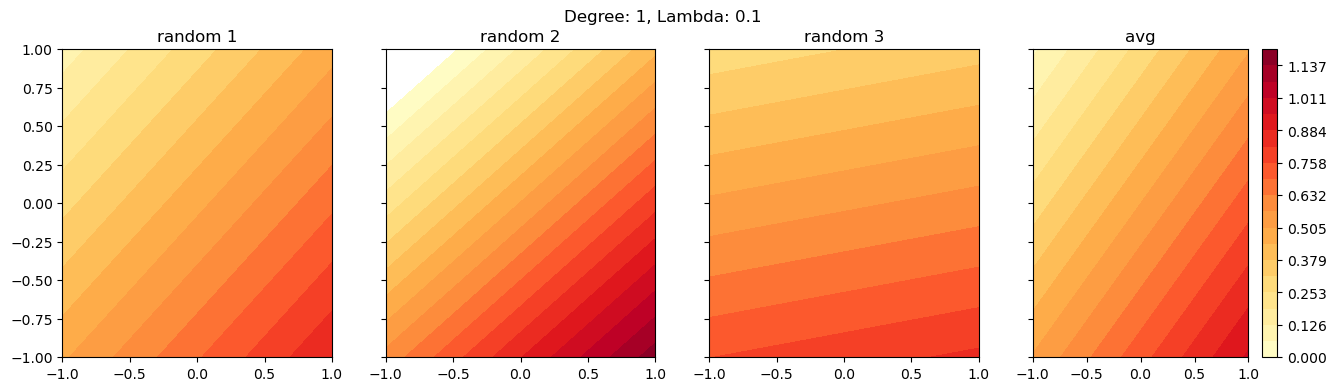

Degree= 1 lambda= 0.1
Bias = 0.23509601678205005
Variance = 0.0038643182164943813
MSE = 0.05913445532328035


<Figure size 640x480 with 0 Axes>

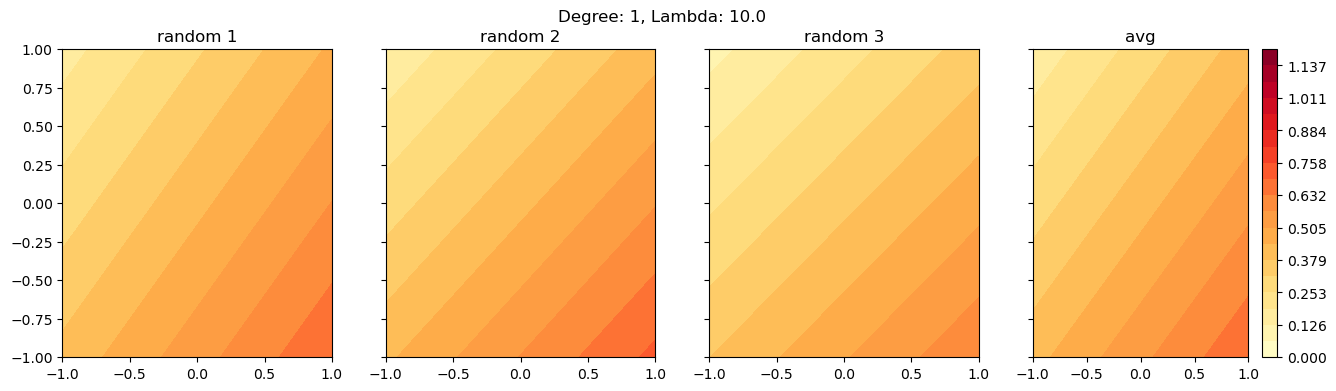

Degree= 1 lambda= 10.0
Bias = 0.25643575873465757
Variance = 0.0017788946889355345
MSE = 0.06753819304675505


<Figure size 640x480 with 0 Axes>

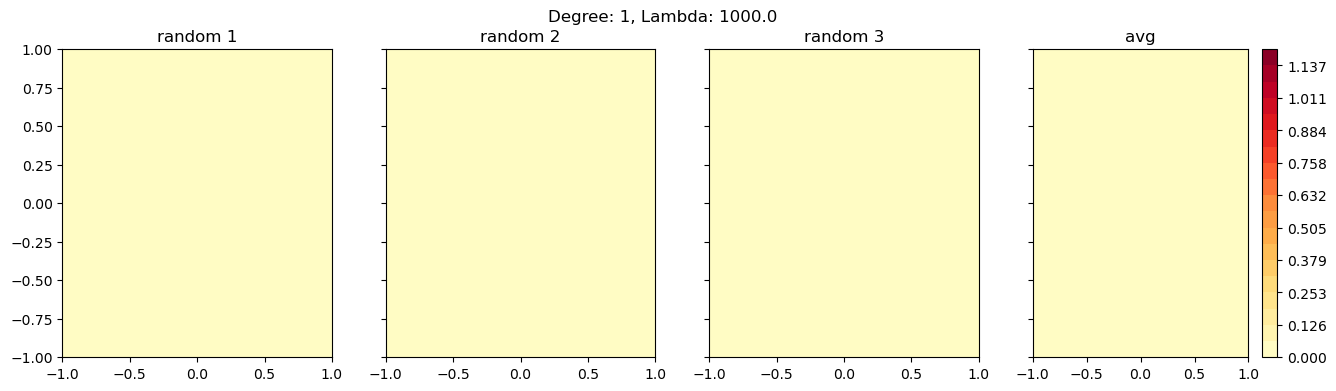

Degree= 1 lambda= 1000.0
Bias = 0.5545565210916114
Variance = 6.39387205785554e-06
MSE = 0.30753932895728864


<Figure size 640x480 with 0 Axes>

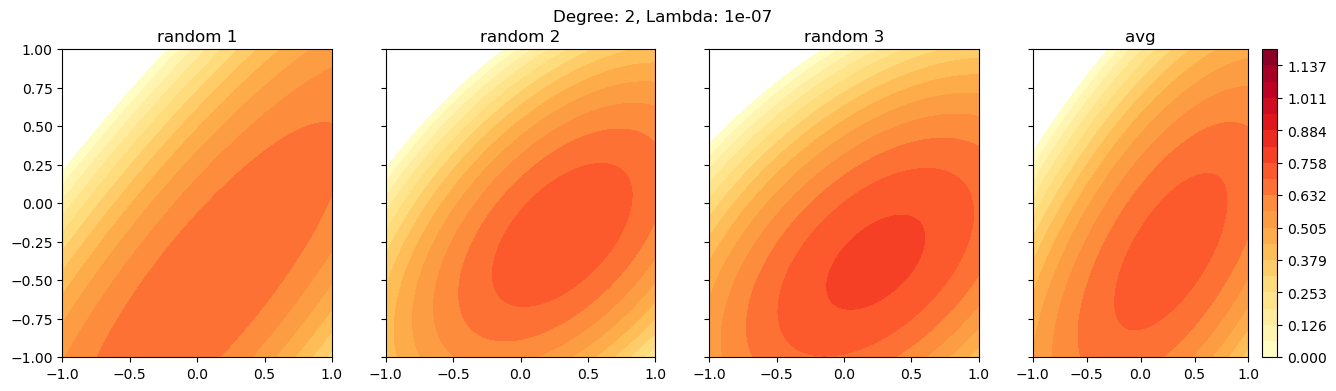

Degree= 2 lambda= 1e-07
Bias = 0.1864012166647888
Variance = 0.005166218859347844
MSE = 0.03991163243346138


<Figure size 640x480 with 0 Axes>

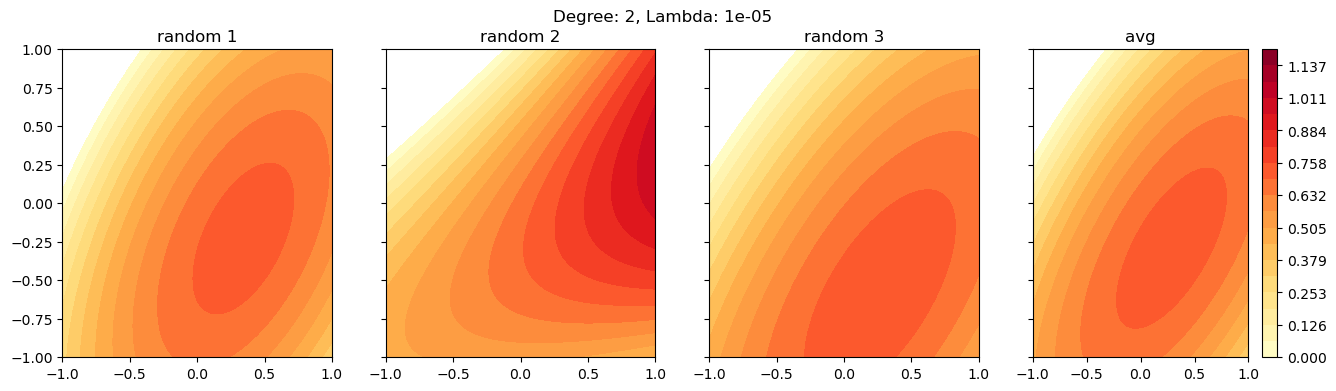

Degree= 2 lambda= 1e-05
Bias = 0.1863410976771345
Variance = 0.005820787612475821
MSE = 0.0405437922959952


<Figure size 640x480 with 0 Axes>

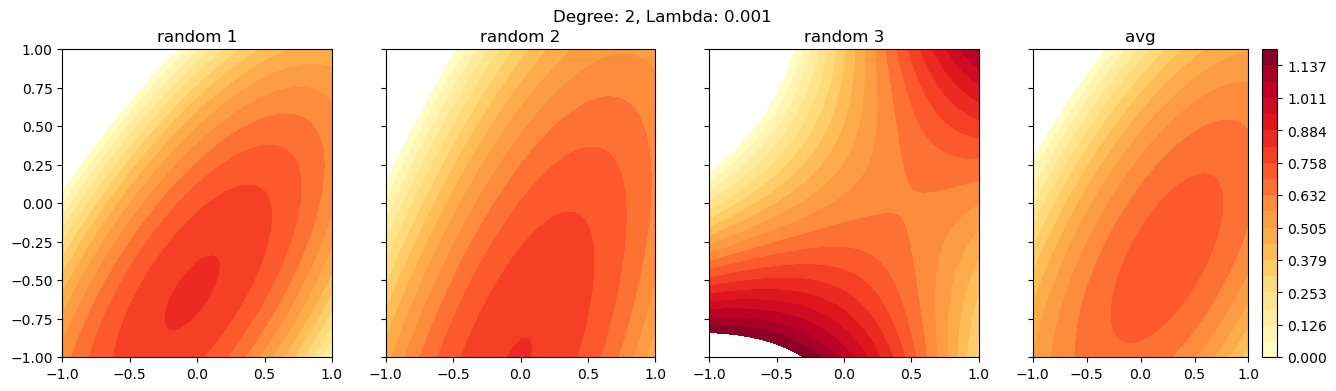

Degree= 2 lambda= 0.001
Bias = 0.18670552104132712
Variance = 0.005769720752130646
MSE = 0.04062867233944409


<Figure size 640x480 with 0 Axes>

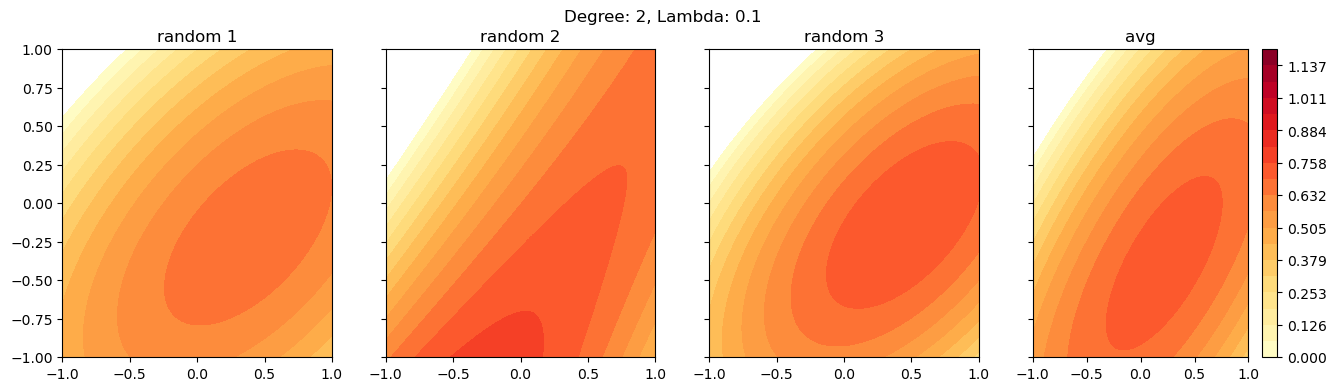

Degree= 2 lambda= 0.1
Bias = 0.18713580577180278
Variance = 0.005548198347249096
MSE = 0.04056800814911099


<Figure size 640x480 with 0 Axes>

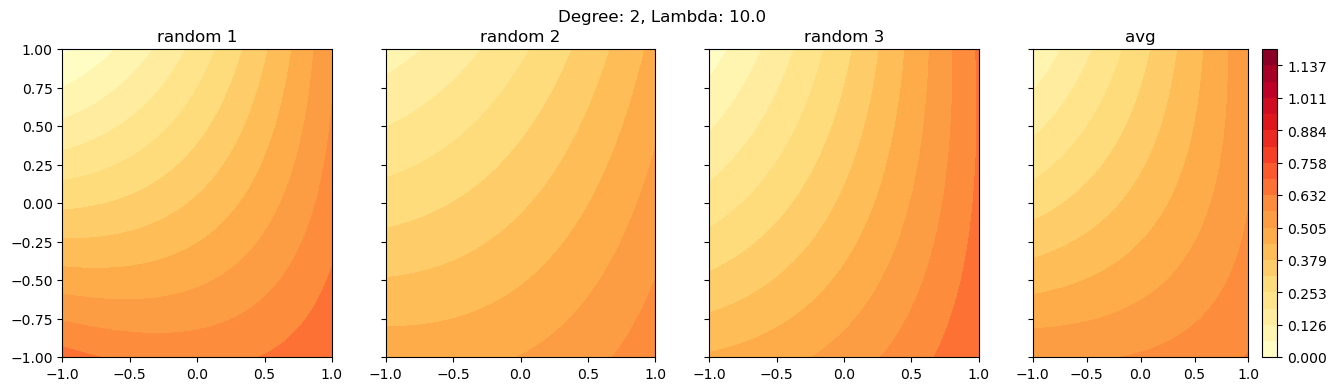

Degree= 2 lambda= 10.0
Bias = 0.24744624965538642
Variance = 0.0018711459742039368
MSE = 0.06310079244271977


<Figure size 640x480 with 0 Axes>

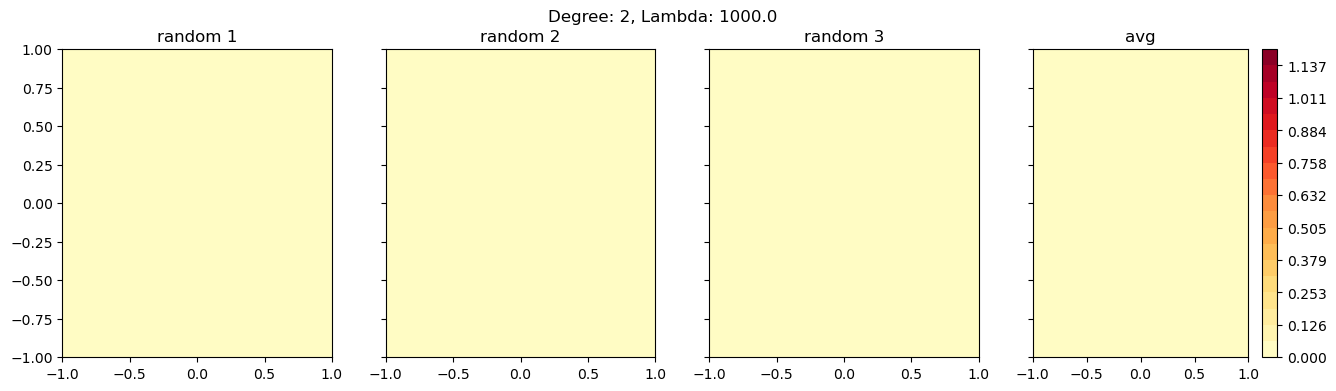

Degree= 2 lambda= 1000.0
Bias = 0.5510698739696915
Variance = 8.486873861833543e-06
MSE = 0.3036864928708336


<Figure size 640x480 with 0 Axes>

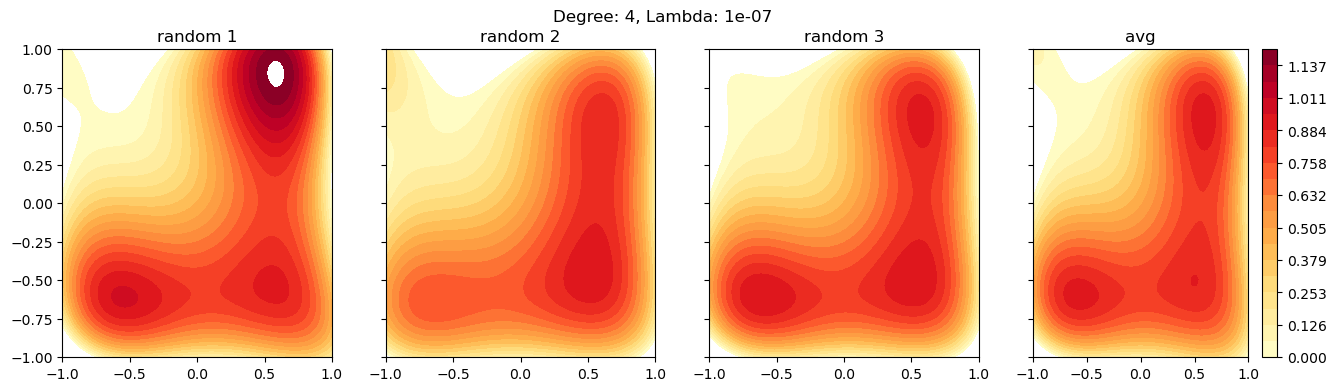

Degree= 4 lambda= 1e-07
Bias = 0.08891761627103939
Variance = 0.0130738993083513
MSE = 0.020980241791675108


<Figure size 640x480 with 0 Axes>

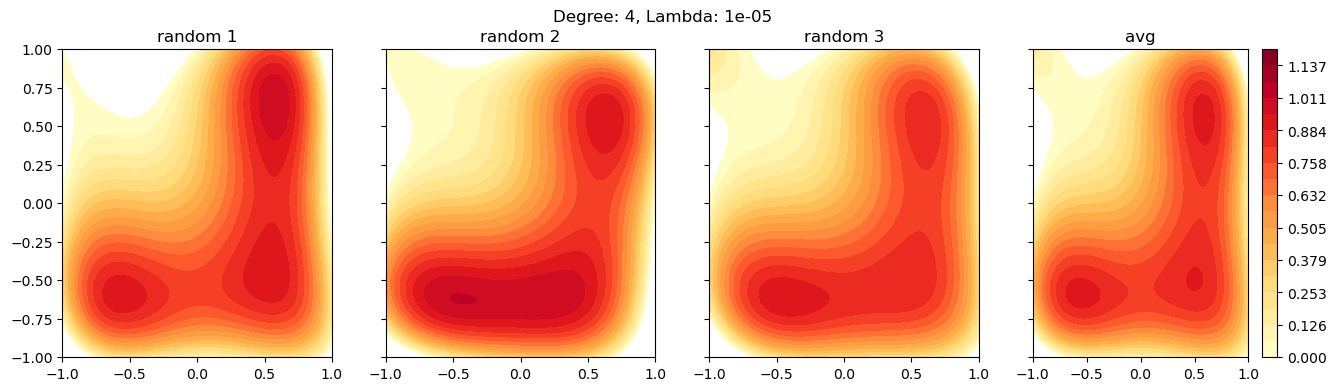

Degree= 4 lambda= 1e-05
Bias = 0.09115589482333787
Variance = 0.009294164152833654
MSE = 0.017603561313877088


<Figure size 640x480 with 0 Axes>

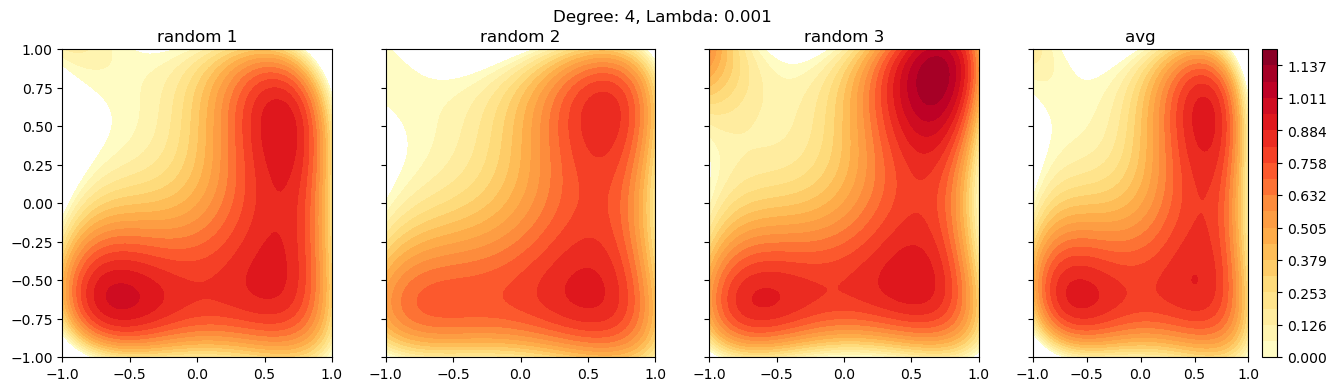

Degree= 4 lambda= 0.001
Bias = 0.0918986791356301
Variance = 0.008101194211350797
MSE = 0.01654656143822429


<Figure size 640x480 with 0 Axes>

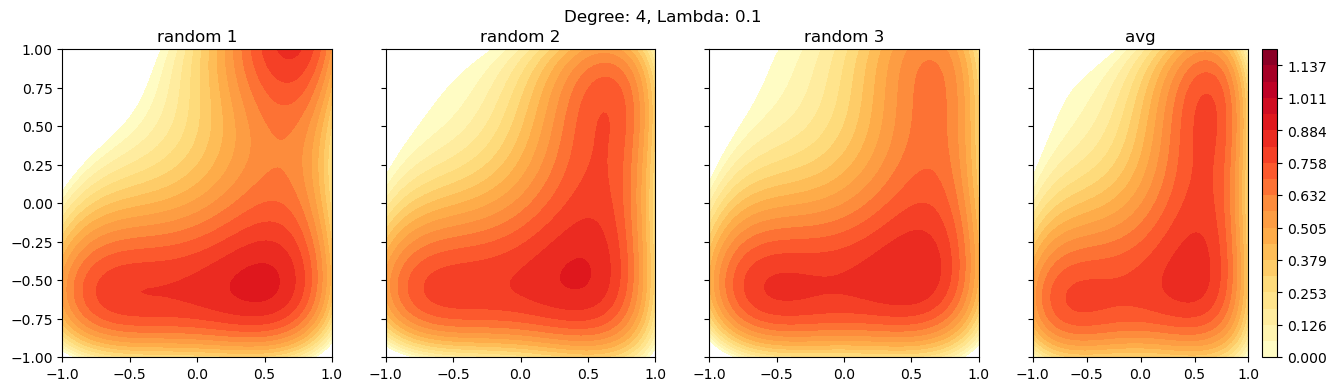

Degree= 4 lambda= 0.1
Bias = 0.09638248721711702
Variance = 0.004246438021956667
MSE = 0.013536021864114393


<Figure size 640x480 with 0 Axes>

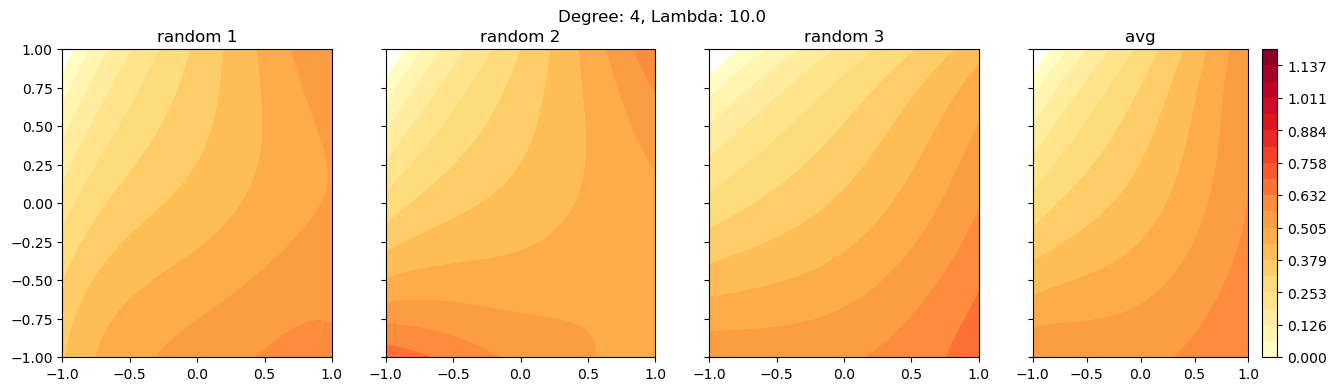

Degree= 4 lambda= 10.0
Bias = 0.2437274134072462
Variance = 0.0020979900778202373
MSE = 0.061501042124006935


<Figure size 640x480 with 0 Axes>

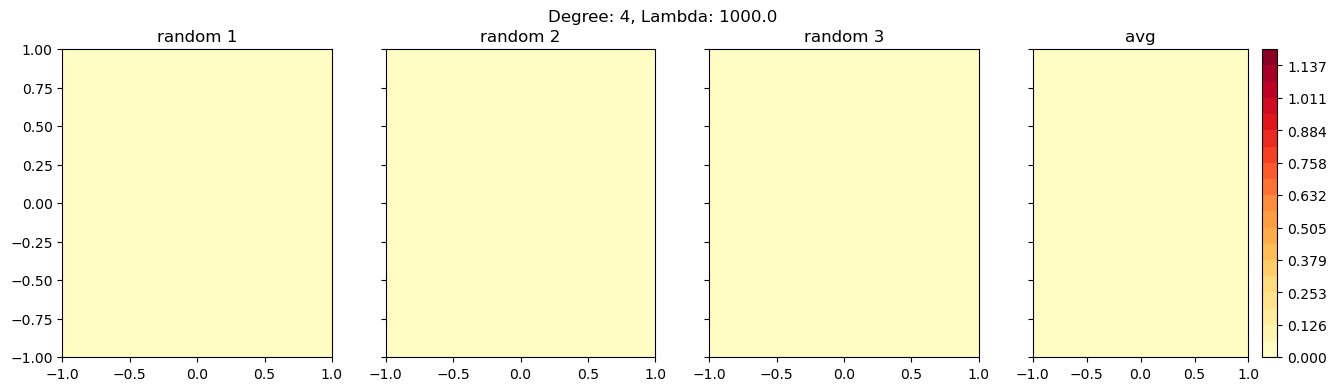

Degree= 4 lambda= 1000.0
Bias = 0.5498104633983916
Variance = 8.108654670505974e-06
MSE = 0.3022996543170246


<Figure size 640x480 with 0 Axes>

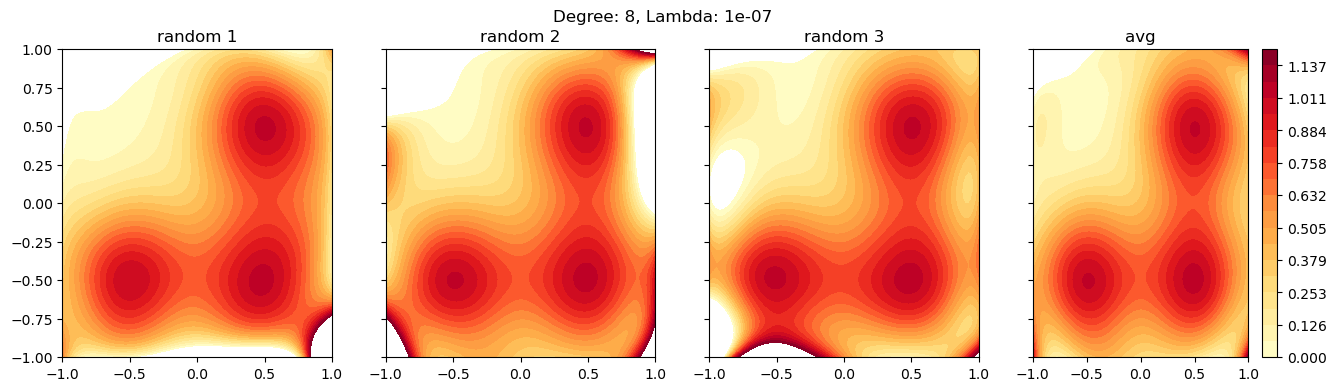

Degree= 8 lambda= 1e-07
Bias = 0.09407699565088899
Variance = 0.2617941956270099
MSE = 0.27064467673770726


<Figure size 640x480 with 0 Axes>

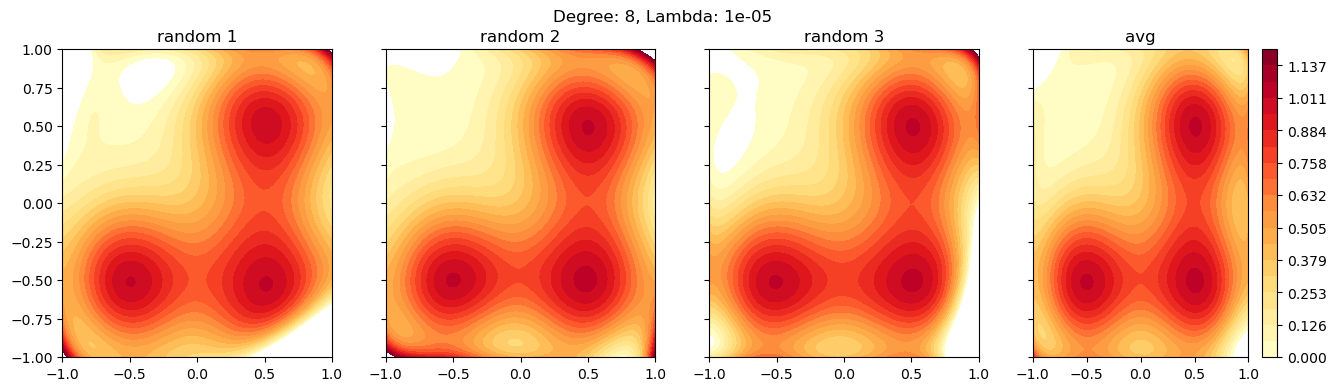

Degree= 8 lambda= 1e-05
Bias = 0.060192450428145965
Variance = 0.04661886481323564
MSE = 0.050241995901780453


<Figure size 640x480 with 0 Axes>

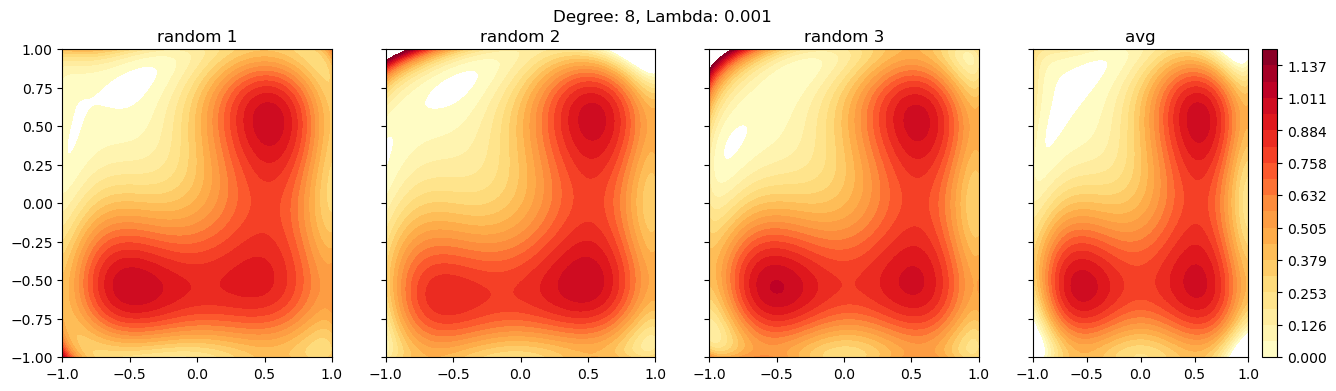

Degree= 8 lambda= 0.001
Bias = 0.06860903478872202
Variance = 0.019932387292972472
MSE = 0.024639586947612542


<Figure size 640x480 with 0 Axes>

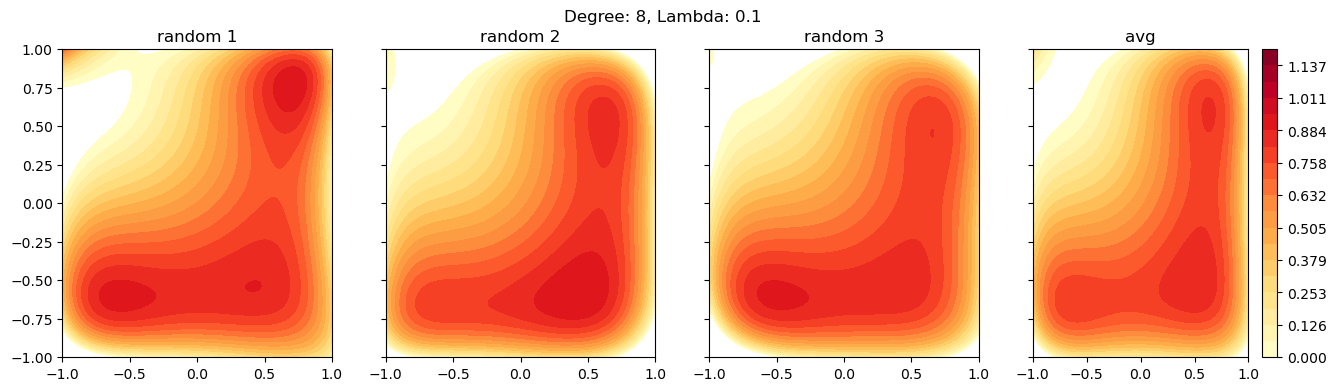

Degree= 8 lambda= 0.1
Bias = 0.1015098767605042
Variance = 0.005791554156683903
MSE = 0.016095809236616652


<Figure size 640x480 with 0 Axes>

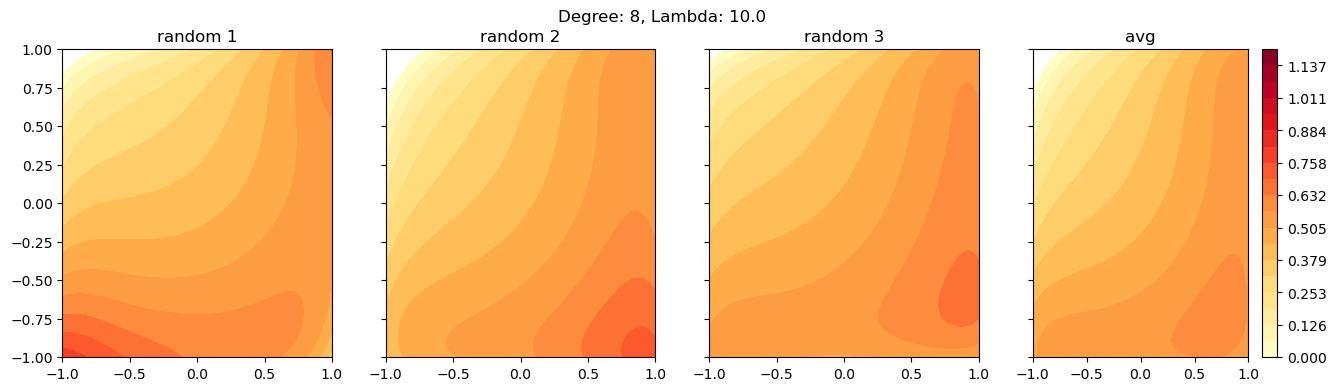

Degree= 8 lambda= 10.0
Bias = 0.2360461857423057
Variance = 0.002520619096748548
MSE = 0.05823842090023964


<Figure size 640x480 with 0 Axes>

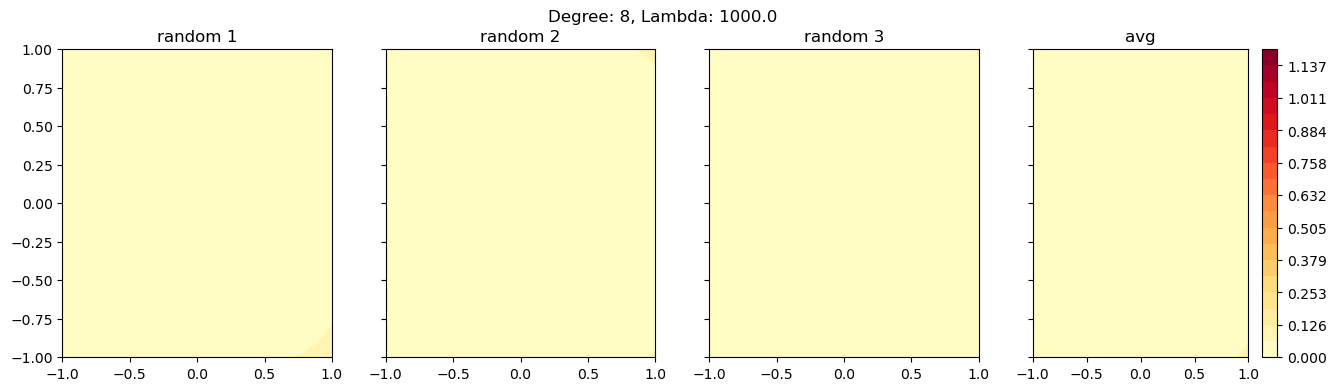

Degree= 8 lambda= 1000.0
Bias = 0.5494679417992712
Variance = 1.2665486111685525e-05
MSE = 0.3019276845512389


<Figure size 640x480 with 0 Axes>

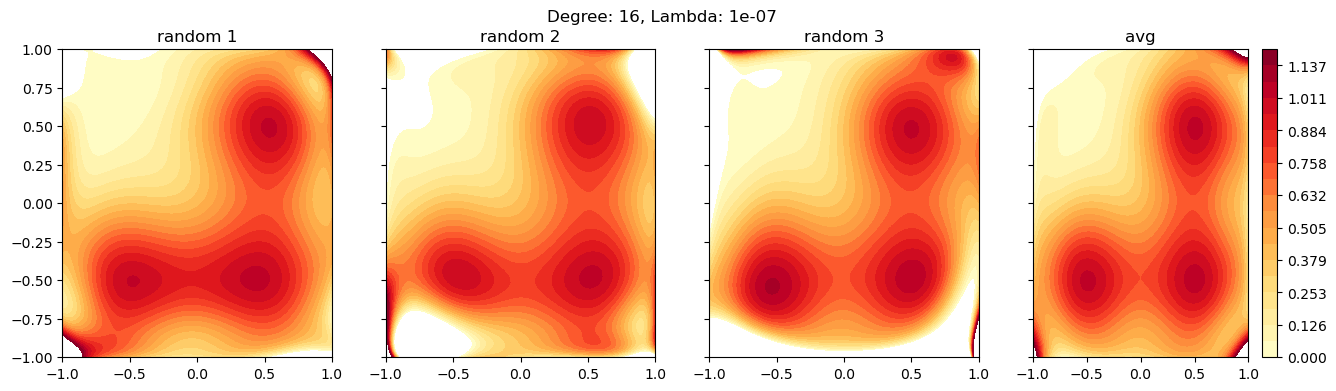

Degree= 16 lambda= 1e-07
Bias = 0.16376573864223132
Variance = 0.4152288939070229
MSE = 0.4420481110600585


<Figure size 640x480 with 0 Axes>

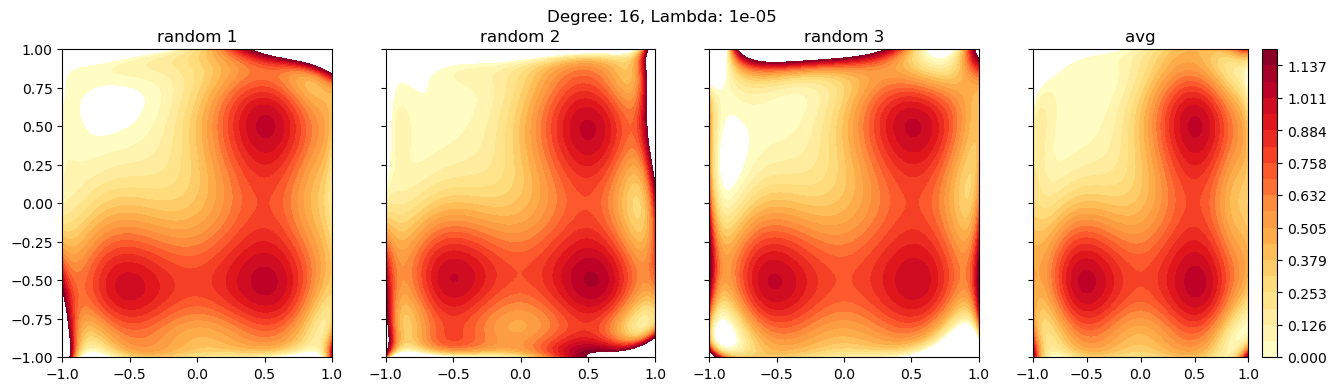

Degree= 16 lambda= 1e-05
Bias = 0.09615751008917538
Variance = 0.20256405548469877
MSE = 0.21181032223124863


<Figure size 640x480 with 0 Axes>

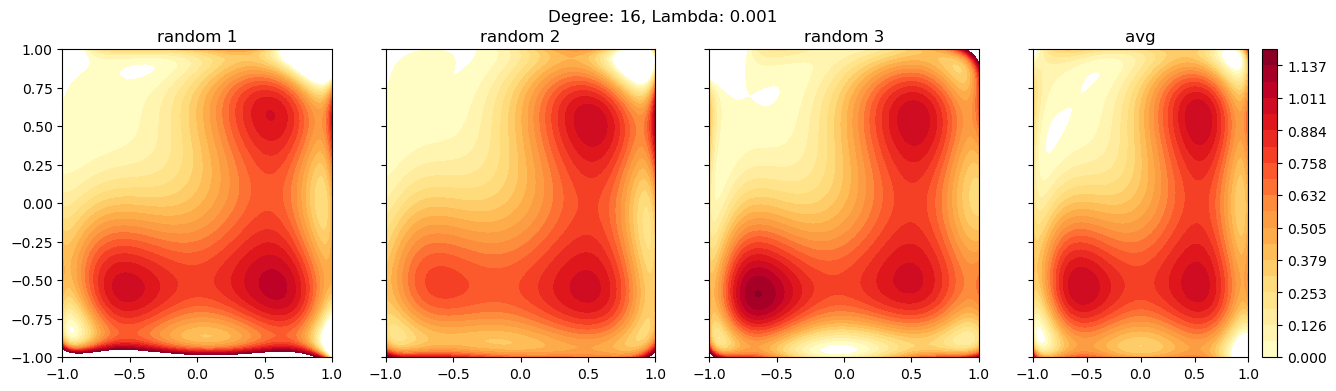

Degree= 16 lambda= 0.001
Bias = 0.08579020330776102
Variance = 0.061669036764404744
MSE = 0.06902899574799172


<Figure size 640x480 with 0 Axes>

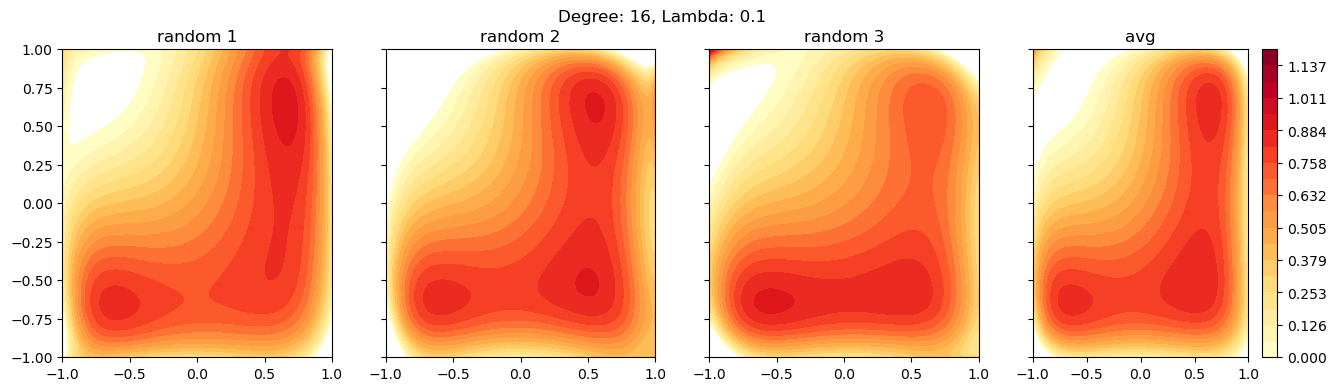

Degree= 16 lambda= 0.1
Bias = 0.10873896344933903
Variance = 0.013096591066789526
MSE = 0.02492075323882622


<Figure size 640x480 with 0 Axes>

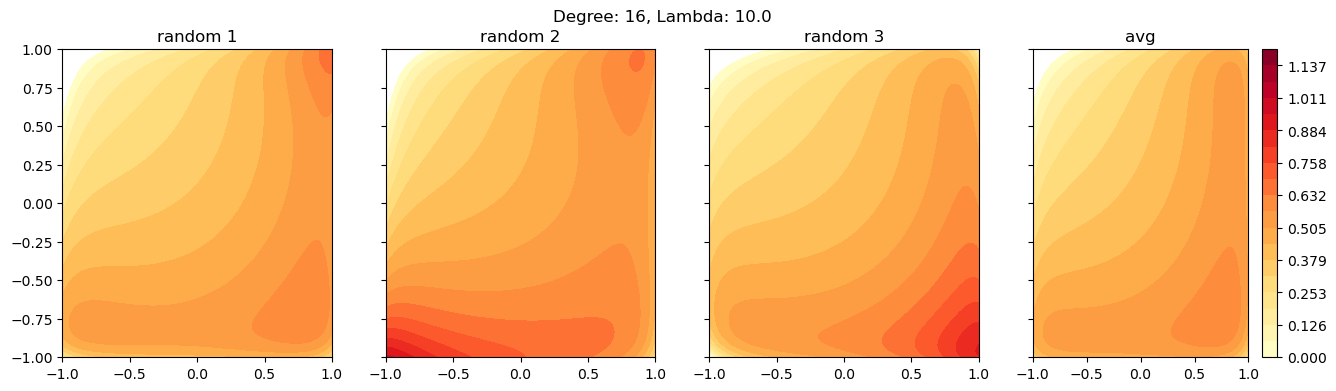

Degree= 16 lambda= 10.0
Bias = 0.2311651231544473
Variance = 0.0027842607205311653
MSE = 0.05622157488354195


<Figure size 640x480 with 0 Axes>

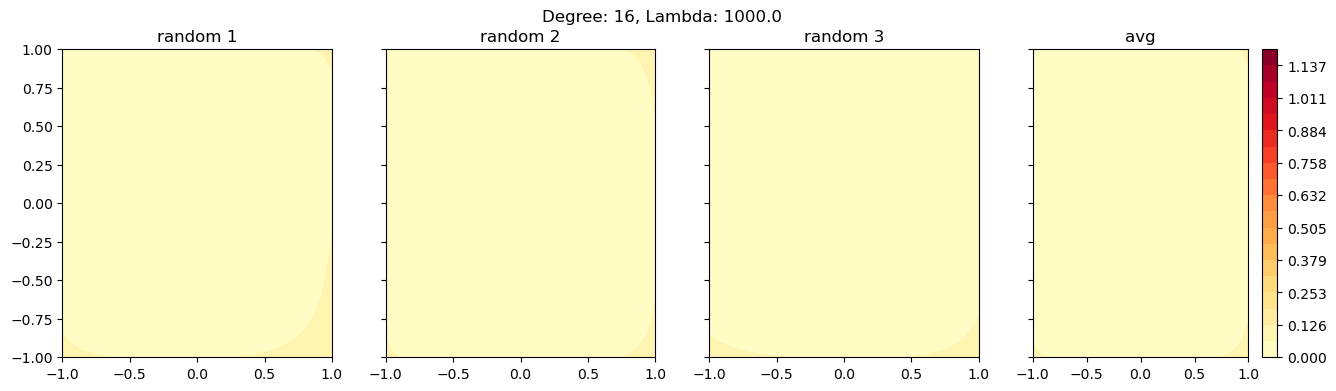

Degree= 16 lambda= 1000.0
Bias = 0.5493611898378989
Variance = 1.8870562529927743e-05
MSE = 0.30181658746264195


In [51]:
# Cell type : CodeWrite

def get_feature_mapping(x, degree=1):
    x1 = x[0]
    x2 = x[1]
    ans = [1]
    for i in range(1, degree+1):
        ans.append(x1**i)
        ans.append(x2**i)
        for j in range(1, i):
            ans.append((x1**j)*(x2**(i-j)))
    return ans

def get_feature_matrix(X, degree=1):
    n = X.shape[0]
    phi = list(np.zeros(shape=n))
    for i in range(n):
        phi[i] = get_feature_mapping(X[i], degree)
    phi = np.array(phi)
    return phi

def get_train_value(x):
    a = np.array([np.array([0.5, 0.5]), np.array([-0.5, -0.5]), np.array([0.5, -0.5])])
    ans = 0
    for i in range(3):
        ans += np.exp(-4*np.dot(np.subtract(x, a[i]), np.subtract(x, a[i])))
    return ans

def get_Y_train(X_train):
    n = X_train.shape[0]
    Y_train = np.zeros(n)
    for i in range(n):
        Y_train[i] = get_train_value(X_train[i])
    return Y_train

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """

    n = X_test.shape[0]
    d = X_test.shape[1]
    phi = get_feature_matrix(X_test, degree)
    return np.matmul(phi, wt_vector)

    
    
def visualise_polynomial_2d(wt_vector, degree, ax, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))

    # Get Z using other functions

    X_test = np.transpose(np.array([np.ndarray.flatten(X), np.ndarray.flatten(Y)]))

    Z = polynomial_regression_ridge_pred(X_test, wt_vector, degree)
    Z = np.reshape(a=Z, newshape=X.shape, order='C')

    contour = ax.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20),cmap='YlOrRd')
    ax.set_title(label=title)
    # ax.colorbar()
    return contour
    # plt.show()

def visualise_actual_2d(ax, title=""):
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    X_test = np.transpose(np.array([np.ndarray.flatten(X), np.ndarray.flatten(Y)]))

    Z = get_Y_train(X_test)
    Z = np.reshape(a=Z, newshape=X.shape, order='C')
    contour = ax.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20),cmap='YlOrRd')
    ax.set_title(label=title)
    return contour
    
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Here you may assume d=2, for simplicity.
    
    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    
    n = X_train.shape[0]
    d = X_train.shape[1]
    phi = get_feature_matrix(X_train, degree)
    return np.matmul(np.transpose(phi), np.matmul(np.linalg.inv(np.add(np.matmul(phi, np.transpose(phi)), reg_param * np.identity(n=n))), Y_train))


    
    
def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """

    wt_vectors = list(np.zeros(shape=100))
    for i in range(100):
        X1_train = np.random.uniform(low=-1, high=1, size=num_training_samples)
        X2_train = np.random.uniform(low=-1, high=1, size=num_training_samples)
        X_train = np.transpose(np.array([X1_train, X2_train]))
        Y_train = get_Y_train(X_train)
        wt_vectors[i] = polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param)
    
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=True, figsize=(16,4))
    visualise_polynomial_2d(wt_vectors[0], degree, ax1, "random 1")
    visualise_polynomial_2d(wt_vectors[50], degree, ax2, "random 2")
    visualise_polynomial_2d(wt_vectors[99], degree, ax3, "random 3")
    wt_vector_avg = np.mean(wt_vectors, axis=0)
    contour = visualise_polynomial_2d(wt_vector_avg, degree, ax4, "avg")
    # contour = visualise_actual_2d(ax5, "actual")

    plt.suptitle("Degree: "+str(degree)+", Lambda: "+str(reg_param))
    plt.colorbar(contour)
    plt.show()

    # Bias**2 = E_x[(g-f*)**2]
    # Var = E_sE_x[(fs-g)**2]
    # MSE = Bias**2 + Var
    # f* -> actual, g -> avg, fs -> current

    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    X_test = np.transpose(np.array([np.ndarray.flatten(X), np.ndarray.flatten(Y)]))

    # Bias calculation
    g_x = polynomial_regression_ridge_pred(X_test, wt_vector_avg, degree)
    y_x = get_Y_train(X_test)
    sq_diff = np.subtract(g_x, y_x)**2
    bias_sq = np.mean(sq_diff)

    # Variance calculation
    var_arr = np.zeros(shape=100)
    for i in range(100):
        fs_x = polynomial_regression_ridge_pred(X_test, wt_vectors[i], degree)
        sq_diff = np.subtract(fs_x, g_x)**2
        var_arr[i] = np.mean(sq_diff)
    var = np.mean(var_arr)
    return (np.sqrt(bias_sq), var, bias_sq+var)


for degree in [1,2,4,8,16]:
# for degree in [4,8,16]:
    for reg_param in [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]:
        plt.figure()
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        
        print('================================')
        print('Degree= '+str(degree)+' lambda= '+str(reg_param))
        print('Bias = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e))

        plt.show()
        

In [ ]:
# Cell type: convenience



** Cell type: TextWrite **
Give the biases and variances computed for the various algorithms with various degrees and lambdas and summarise your findings.

### Bias table:

| Degree\Lambda | 1e-7                | 1e-5                | 1e-3                | 1e-1                | 1e1                 | 1e3                |
| :-----------: | :-----------------: | :-----------------: | :-----------------: | :-----------------: | :-----------------: | :----------------: |
| <b>1</b>      | 0.2348924892519821  | 0.23503852353357066 | 0.23474704815526196 | 0.23489841870790393 | 0.2561171763146804  | 0.5545202854871742 |
| <b>2</b>      | 0.1870570161153684  | 0.18739727959904678 | 0.1867845602558093  | 0.1865090570034006  | 0.2478176224180198  | 0.5513724518732486 |
| <b>4</b>      | 0.08976297402268275 | 0.09265826776804773 | 0.08870481224390589 | 0.09719550129764325 | 0.24592620314697974 | 0.5500024163152023 |
| <b>8</b>      | 0.10903304931275991 | 0.06830580778428738 | 0.07184459683218818 | 0.0999726214552652  | 0.23812573545370158 | 0.549326864941338  | 
| <b>16</b>     | 0.13663914636977925 | 0.10951445717736528 | 0.07626617389799337 | 0.10855141864090409 | 0.22929856086558909 | 0.5488390759729798 |

### Variance table:

| Degree\Lambda | 1e-7                 | 1e-5                  | 1e-3                  | 1e-1                  | 1e1                   | 1e3                    |
| :-----------: | :------------------: | :-------------------: | :-------------------: | :-------------------: | :-------------------: | :--------------------: |
| <b>1</b>      | 0.004452515216769246 | 0.003897176532001778  | 0.0037785118188461793 | 0.0035142227759134242 | 0.0015944258414916667 | 7.515124675699347e-06  |
| <b>2</b>      | 0.005702691979129477 | 0.005915118264855051  | 0.0053538624218594484 | 0.005208687304784284  | 0.0018731344151711007 | 8.812955841296339e-06  |
| <b>4</b>      | 0.009942758801781833 | 0.0093058774254231    | 0.0070253706441185115 | 0.004752350277209428  | 0.0022879530733268027 | 1.0839043960552936e-05 |
| <b>8</b>      | 0.1923683308049711   | 0.04563186893810381   | 0.020260844596660534  | 0.0076498146869606876 | 0.002424035632881029  | 1.4758202861521697e-05 | 
| <b>16</b>     | 0.38261516408952345  | 0.1583298032829421    | 0.062479171966121475  | 0.014564507687769214  | 0.0031137577968033663 | 1.8107314978632584e-05 |

** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




Training set size:  50
L-R: Increasing lambda, T-D: Increasing degree
Training set errors:
0.2503831240658675 0.25038312406572727 0.25038312406574026 0.25038312419627545 0.2503844155180828 0.25589782969635694 
0.13411159812197213 0.13411159812134169 0.13411159812242812 0.1341116089798747 0.13421305918294474 0.1974826992879742 
0.10201831452799265 0.10201831452661934 0.10201831464463723 0.10201945605437712 0.10410664921246371 0.18063792530763298 
0.00013273273937580818 0.00019915711672317447 0.010765781158537617 0.041721344555995916 0.08199099254870269 0.16319970182567986 
1.9565631814698562e-08 9.367001060202221e-06 0.0013176931543960073 0.031113092536478676 0.07002070549491671 0.1500128602707264 
Test set errors:
0.3012668386651218 0.3012668173294287 0.3012667744406005 0.30126249638196617 0.30083822424918816 0.2783506938903703 
0.15790003266687222 0.1578999882318238 0.15789985172183796 0.15788631804651093 0.15673525917060444 0.20822364120741071 
0.15733401600111468 0.15733395641151166

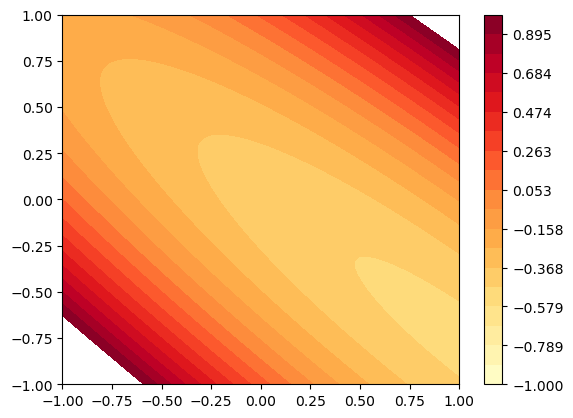

Training set size:  100
L-R: Increasing lambda, T-D: Increasing degree
Training set errors:
0.2580910133402605 0.25809101333931384 0.2580910133393146 0.25809101334983686 0.25809111800124085 0.25873987508331553 
0.1309506275090611 0.13095062750764658 0.13095062750780448 0.1309506290910284 0.1309660877087941 0.16496776073260552 
0.11302663784416828 0.11302663784179307 0.11302663785305089 0.11302674963672642 0.11365141158303721 0.15237348873650713 
0.04158792642045383 0.041587937516277075 0.04168003942637112 0.05800846639789686 0.09290160568698454 0.14488569592362951 
7.734495223208589e-06 0.00048396690114663665 0.007544023924202816 0.04172918471042625 0.08369694254931276 0.1395438378020544 
Test set errors:
0.27203518035927154 0.27203520240838364 0.2720351963443784 0.27203457199636066 0.27197241087975704 0.26773629724246145 
0.4000027955708169 0.40000263179861895 0.40000234628568243 0.39997376963412934 0.3971651016862127 0.2989892765111622 
0.42931018861780595 0.42931018407686117 0.42930

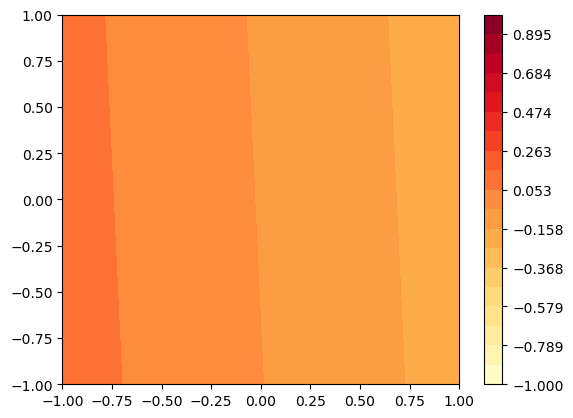

Training set size:  200
L-R: Increasing lambda, T-D: Increasing degree
Training set errors:
0.2465350744803551 0.24653507447805376 0.2465350744780527 0.2465350744794022 0.24653508793957893 0.24664115434052242 
0.13366532561006028 0.1336653256003588 0.1336653256003921 0.13366532593756617 0.13366866006096548 0.14754903759873955 
0.11333815612164141 0.11333815608726933 0.11333815609035075 0.11333818685601951 0.11358989298188121 0.14444440429596625 
0.061737322312378405 0.061737322385246325 0.061738100909675735 0.06394973229162126 0.09568723069707914 0.14119279224291706 
2.8817021598738106e-05 0.0010854317276281613 0.011325564335367749 0.0444632675032409 0.08349956671799383 0.13376259890526832 
Test set errors:
0.2671307756104283 0.26713092012272094 0.26713092145432216 0.26713075934008573 0.2671145844471253 0.2657791843846001 
0.38886720822957993 0.38886731690497645 0.3888671806140373 0.38885418848300035 0.38756557351761206 0.3184741012072479 
0.42485397861559393 0.42485421375349736 0.4248

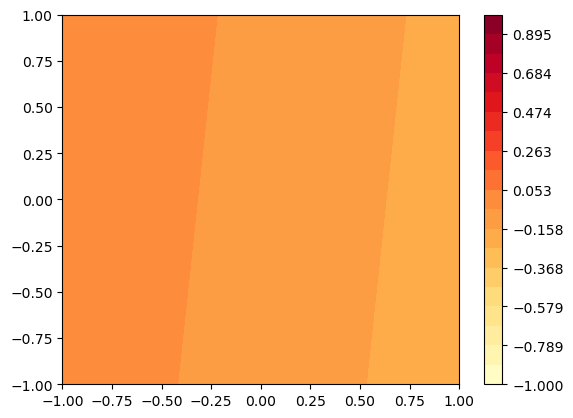

KeyboardInterrupt: 

In [56]:
# Cell type : CodeWrite 

# *** IMPORTANT ***: This cell has dependencies on the previous CodeWrite cell 
# As the previous cell takes too long to run, the for loops at the end after the definitions may be commented out and run

def get_feature_mapping(x, degree=1):
    x1 = x[0]
    x2 = x[1]
    ans = [1]
    for i in range(1, degree+1):
        ans.append(x1**i)
        ans.append(x2**i)
        for j in range(1, i):
            ans.append((x1**j)*(x2**(i-j)))
    return ans

def get_feature_matrix(X, degree=1):
    n = X.shape[0]
    phi = list(np.zeros(shape=n))
    for i in range(n):
        phi[i] = get_feature_mapping(X[i], degree)
    phi = np.array(phi)
    return phi

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """

    n = X_test.shape[0]
    d = X_test.shape[1]
    phi = get_feature_matrix(X_test, degree)
    return np.matmul(phi, wt_vector)

def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Here you may assume d=2, for simplicity.
    
    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    
    n = X_train.shape[0]
    d = X_train.shape[1]
    phi = get_feature_matrix(X_train, degree)
    return np.matmul(np.transpose(phi), np.matmul(np.linalg.inv(np.add(np.matmul(phi, np.transpose(phi)), reg_param * np.identity(n=n))), Y_train))



def find_mse(y_true, y_pred):
    sq_error = np.subtract(y_pred, y_true)**2
    return np.mean(sq_error)


dataset4_1 = np.load("Datasets/dataset4_1.npz")
X_train = dataset4_1['arr_0']
Y_train = dataset4_1['arr_1']
X_test = dataset4_1['arr_2']
Y_test = dataset4_1['arr_3']
degrees = [1, 2, 4, 8, 16]
reg_params = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]
train_sizes = [50, 100, 200, 1000]

for train_size in train_sizes:
    train_error = np.zeros(shape=(5,6))
    test_error = np.zeros(shape=(5,6))
    # wt_vector = [
    #     [0, 0, 0, 0, 0, 0],
    #     [0, 0, 0, 0, 0, 0],
    #     [0, 0, 0, 0, 0, 0],
    #     [0, 0, 0, 0, 0, 0],
    #     [0, 0, 0, 0, 0, 0]
    # ]
    # wt_vector = 0
    X_train_subset = X_train[0:train_size]
    Y_train_subset = Y_train[0:train_size]
    for i,degree in enumerate(degrees):
        for j,reg_param in enumerate(reg_params):
            # wt_vector[i][j] = polynomial_regression_ridge_train(X_train_subset, Y_train_subset, degree, reg_param)
            wt_vector = polynomial_regression_ridge_train(X_train_subset, Y_train_subset, degree, reg_param)
            # Y_train_pred = polynomial_regression_ridge_pred(X_train_subset, wt_vector[i][j], degree)
            # Y_test_pred = polynomial_regression_ridge_pred(X_test, wt_vector[i][j], degree)
            Y_train_pred = polynomial_regression_ridge_pred(X_train_subset, wt_vector, degree)
            Y_test_pred = polynomial_regression_ridge_pred(X_test, wt_vector, degree)
            train_error[i][j] = find_mse(Y_train_subset, Y_train_pred)
            test_error[i][j] = find_mse(Y_test, Y_test_pred)








    print('================================')
    print("Training set size: ", train_size)
    print("L-R: Increasing lambda, T-D: Increasing degree")
    print("Training set errors:")
    for i in range(5):
        for j in range(6):
            print(train_error[i][j], end=' ')
        print("")
    print("Test set errors:")
    for i in range(5):
        for j in range(6):
            print(test_error[i][j], end=' ')
        print("")
    comb_index = np.argmin(test_error)
    best_degree = degrees[comb_index//6]
    best_lambda = reg_params[comb_index%6]
    print("Best degree = ", best_degree)
    print("Best lambda = ", best_lambda)
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    X_test = np.transpose(np.array([np.ndarray.flatten(X), np.ndarray.flatten(Y)]))

    wt_vector = polynomial_regression_ridge_train(X_train_subset, Y_train_subset, best_degree, best_lambda)
    Z = polynomial_regression_ridge_pred(X_test, wt_vector, best_degree)
    Z = np.reshape(a=Z, newshape=X.shape, order='C')
    plt.figure()
    contour = plt.contourf(X,Y,Z,levels=np.linspace(-1.,1. , 20),cmap='YlOrRd')
    plt.colorbar(contour)
    plt.show()
    

            


** Cell type : TextWrite **

** Cell type : TextRead **

# Problem 5 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell.

(You will have to analyse the posterior expression W|X,Y discussed in class, and figure out the posterior form for W.)










In [1]:
# Cell type : CodeWrite 


** Cell type : TextWrite **